# Checkpoint 2
Exécute le code ci-dessous.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics  import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  # Importer KNeighborsClassifier pour la classification par K plus proches voisins
from sklearn.svm import SVC  # Importer SVC pour la classification par Support Vector Machines
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music.loc[(df_music["energy"] > 0.2) & (df_music["energy"] < 0.22) & (df_music["genre"].isin(["Opera" , "Reggaeton"]) == False), "liveness" ] = np.nan

# Analyse Exploratoire des Données et Traitement des Données (environ 1h30)

## 1.1 Introduction
Affichez les 6 premières lignes du jeu de données.

In [ ]:
# Your code here :

df_music.head(6)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.9100,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.7370,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.1310,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.3260,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.2250,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.749,0.578,160627,0.0948,0.000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358


Décrivez le jeu de données et commentez la colonne popularity.

In [ ]:
# Your code here :

df_music.describe()

'''
Il y a 232725 entrées dans la colonne popularity, le minimum est 0, le maximum 100, la moyenne 41 et la médiane 43.
'''

'\nIl y a 232725 entrées dans la colonne popularity, le minimum est 0, le maximum 100, la moyenne 41 et la médiane 43.\n'

Vérifiez la présence / absence de valeurs manquantes dans chaque colonne et commentez votre résultat.

In [ ]:
# Your code here :

df_music.isna().sum()

'''
Il y a une valeur manquante dans track_name et 2105 dans liveness.
'''

'\nIl y a une valeur manquante dans track_name et 2105 dans liveness.\n'

## 1.2 Des informations sur les artistes
Donnez le nombre de morceaux pour chaque artiste.

Voici les premières lignes attendues :


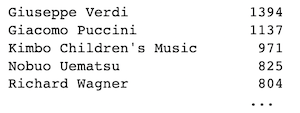

In [ ]:
# Your code here :

df_music.groupby('artist_name')['artist_name'].count().sort_values(ascending = False)

,artist_name
artist_name,
Giuseppe Verdi,1394
Giacomo Puccini,1137
Kimbo Children's Music,971
Nobuo Uematsu,825
Richard Wagner,804
...,...
Melanie De Biasio,1
Mel Tillis,1
Mel Levin,1



Donnez la moyenne de popularité pour chaque artiste. Le résultat sera trié par ordre décroissant pour une meilleure lisibilité.

*Vous pouvez utiliser `groupby`, `crosstab` ou `pivot_table` pour répondre à ces questions.*

Voici les premières lignes attendues :

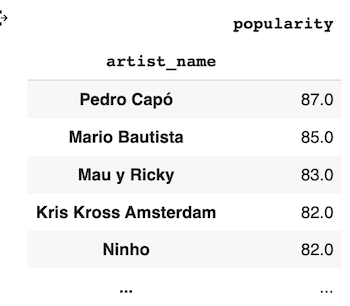

In [ ]:
# Your code here :

df_music[['artist_name', 'popularity']].groupby('artist_name').mean('popularity').sort_values(by ='popularity', ascending = False)

,popularity
artist_name,
Pedro Capó,87.0
Mario Bautista,85.0
Mau y Ricky,83.0
Kris Kross Amsterdam,82.0
Ninho,82.0
...,...
Brent Holmes,0.0
The Wayfarers,0.0
Nursery Rhymes Club,0.0


## 1.3 Qu'en est-il de Queen ?
Affichez un DataFrame contenant uniquement Queen.
Vous devriez obtenir 97 lignes.

In [ ]:
# Your code here :

df_music[df_music['artist_name'] == 'Queen']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
152988,Rock,Queen,We Are The Champions,4kzvAGJirpZ9ethvKZdJtg,50,0.23000,0.460,180667,0.4820,0.000000,A#,0.1010,-7.413,Major,0.0285,94.975,3/4,0.2020
153284,Rock,Queen,"Get Down, Make Love - Remastered 2011",1DdC1R2eDWg3Xq9RPSX4h2,50,0.42300,0.441,230120,0.7230,0.000000,G#,0.3600,-4.746,Major,0.2570,143.711,4/4,0.4540
153622,Rock,Queen,Sheer Heart Attack - Remastered 2011,5AHQ3hXjXQzmtCT5iEkh2f,50,0.00867,0.359,207600,0.9310,0.001890,A#,0.3590,-4.564,Major,0.1080,91.499,4/4,0.4180
153734,Rock,Queen,Seaside Rendezvous - Remastered 2011,5w49nWH532c39tuJ3kthEm,49,0.40800,0.450,134133,0.7060,0.000000,C,0.2920,-5.462,Major,0.1130,167.906,4/4,0.7640
154806,Rock,Queen,Sleeping On The Sidewalk - Remastered 2011,6T4mvqvMIwa0S6EH84QAAJ,48,0.48400,0.615,186080,0.7700,0.000168,E,0.3250,-7.674,Major,0.0274,129.734,4/4,0.6450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225833,Rock,Queen,Fat Bottomed Girls,39sH8Fl415P7O8GRP1Td6Z,51,0.04000,0.252,255533,0.6570,0.000016,D,0.3270,-10.102,Major,0.0581,178.010,4/4,0.3980
225906,Rock,Queen,"All Dead, All Dead - Remastered 2011",1YBkXyn1nlp2SdCdsNkGtS,51,0.79000,0.456,189587,0.0799,0.000108,F,0.1100,-14.775,Major,0.0344,88.914,4/4,0.2530
226106,Rock,Queen,Somebody To Love,3CCxL8R4wxfrGKqAmprgQi,51,0.11600,0.491,295960,0.5810,0.000000,G#,0.1250,-10.693,Major,0.0542,110.179,3/4,0.4220
226296,Rock,Queen,No-One But You (Only The Good Die Young),4pRnWYreOtP4jXdvhzRvdA,51,0.57300,0.496,251333,0.4000,0.000000,C,0.0909,-8.272,Minor,0.0301,119.395,3/4,0.0932


Quelles sont leurs 3 chansons les plus populaires ?

Voici les lignes attendues :

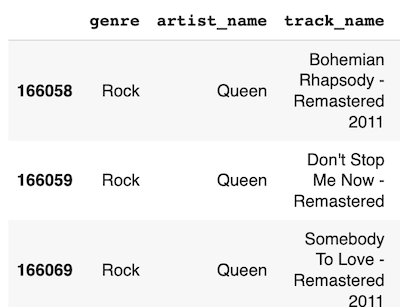

In [ ]:
# Your code here :

df_music[df_music['artist_name'] == 'Queen'].sort_values(by = 'popularity', ascending = False).head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
166058,Rock,Queen,Bohemian Rhapsody - Remastered 2011,7tFiyTwD0nx5a1eklYtX2J,82,0.2540,0.397,354320,0.396,0.000000,D#,0.268,-9.910,Major,0.0500,142.913,4/4,0.227
166059,Rock,Queen,Don't Stop Me Now - Remastered,7hQJA50XrCWABAu5v6QZ4i,81,0.0488,0.559,209413,0.855,0.000681,F,0.680,-5.077,Major,0.1860,156.311,4/4,0.605
166069,Rock,Queen,Somebody To Love - Remastered 2011,6cFZ4PLC19taNlpl9pbGMf,77,0.1720,0.492,296493,0.676,0.000000,G#,0.239,-6.861,Major,0.0516,110.232,3/4,0.412


## 1.4 Transformation
En utilisant `apply`, créez une nouvelle colonne `most_popular` qui contient :
- "Most popular" si la popularité est supérieure ou égale à 90
- "Other song" sinon.

In [ ]:
# Your code here :

df_music['most_popular'] = df_music['popularity'].apply(lambda x : "Most popular" if x >= 90 else "Other song")

Combien de chansons sont "Most popular" ?

In [ ]:
# Your code here :

df_music['most_popular'][df_music['most_popular'] == "Most popular"].count()

130

## Remplacement des valeurs manquantes
Analysez la colonne `liveness` (statistiques descriptives et graphiques). Créez une nouvelle colonne `flag_missing_value` qui contient `1` si `liveness` est manquante, et `0` sinon.

Ensuite, remplacez les valeurs manquantes dans la colonne `liveness` avec la valeur la plus pertinente **entre la moyenne et la médiane**.

In [ ]:
# Your code here :

df_music['flag_missing_value'] = df_music['liveness'].apply(lambda x : 0 if x > 0 else 1)

In [ ]:
df_music['liveness'].median(), df_music['liveness'].mean()

(0.129, 0.21543693148902954)

In [ ]:
df_music['liveness'][df_music['flag_missing_value'] == 1] = df_music['liveness'].median()

<ipython-input-325-6272730fea5a>:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-325-6272730fea5a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

# Dataviz (approximately 1h)

## 2.1 Corrélations

Affichez une **heatmap de corrélation**.

L'échelle des couleurs doit être **centrée sur la valeur 0**, afin de distinguer les valeurs négatives et positives. Choisissez une belle **palette divergente**.

In [ ]:
import seaborn as sns

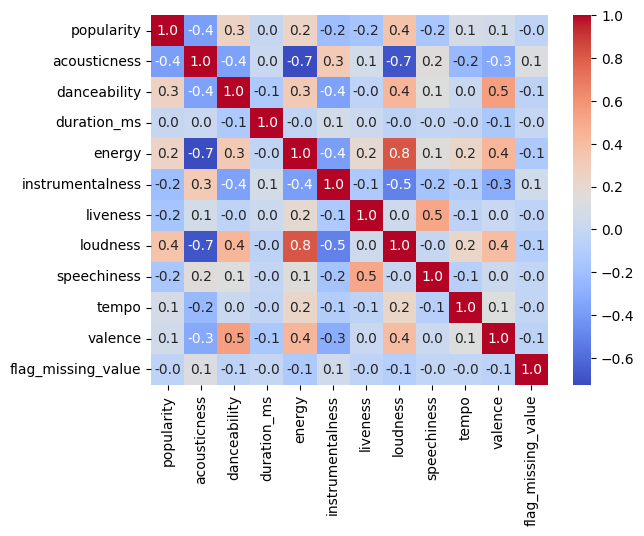

In [ ]:
# Your code here :
corr = df_music.select_dtypes(include = 'number').corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt=".1f");

Certaines colonnes semblent avoir de fortes corrélations négatives entre elles.
- Lesquelles ?
- Qu'est-ce que cela signifie ?

In [ ]:
# Your answers here :

'''
Fortes corrélations négatives :
- Energy et Acousticness (-0,7)
- Loudness et Acousticness (-0,7)
- Loudness et Instrumentalness (-0,5)

Cela signifie que lorsqu'une l'une des valeurs augmente, l'autre diminue,
et inversement.
'''

"\nFortes corrélations négatives :\n- Energy et Acousticness (-0,7)\n- Loudness et Acousticness (-0,7)\n- Loudness et Instrumentalness (-0,5)\n\nCela signifie que lorsqu'une l'une des valeurs augmente, l'autre diminue,\net inversement.\n"

Trouvez le coefficient de corrélation entre Energy et Acousticness

In [ ]:
# Your code here :

x = df_music['energy']
y = df_music['acousticness']

x.corr(y)

-0.725576364709052

## 2.2 Nuage de points
Dessinez un nuage de points (scatterplot) représentant Energy et Acousticness :
- En incluant **uniquement les genres Opera et Reggaeton**
- Chaque genre aura sa propre couleur

Voici un exemple du résultat attendu :

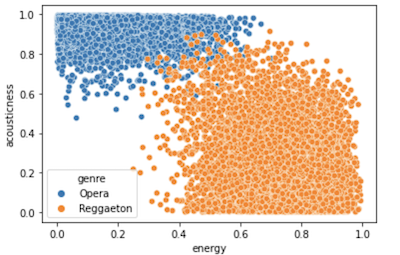

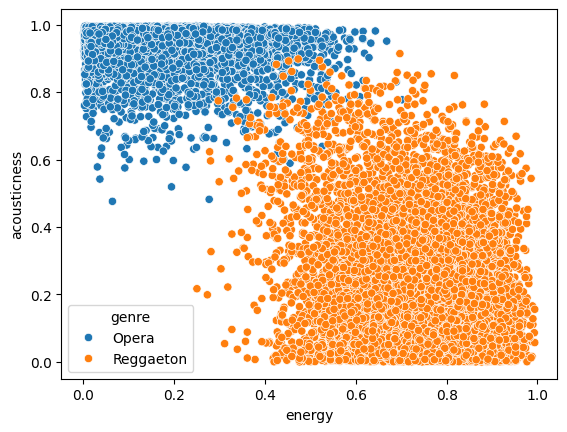

In [ ]:
# Your code here :

sns.scatterplot(data = df_music[(df_music['genre'] == 'Opera') | (df_music['genre'] == 'Reggaeton')],
                x = 'energy',
                y = 'acousticness',
                hue = 'genre');

## 2.3 Boîte à moustaches
Dessinez sur la même figure 2 boîtes à moustaches : 1 par genre.
- Les boîtes à moustaches doivent être verticales
- Filtrez uniquement sur les genres Opera et Reggaeton
- Vos boîtes à moustaches représentent la danceability

Votre graphique doit être similaire à celui-ci (sans la flèche rouge)

![boxplot](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_boxplot.png)

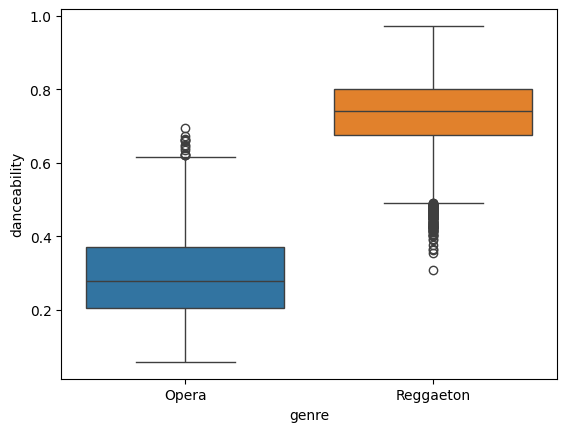

In [ ]:
sns.boxplot(data = df_music[(df_music['genre'] == 'Opera') | (df_music['genre'] == 'Reggaeton')],
            x = 'genre',
            y = 'danceability',
            hue = 'genre');

Comment le lire ?

Que représente la ligne horizontale près de la flèche rouge ? Qu'est-ce que cela signifie ?

In [ ]:
# Your answer here :

'''
La ligne horizontale désignée par la flèche rouge représente le
3ème quartile des valeurs de Danceability pour le genre Reggaetton.
Autrement dit la valeur de Danceability avant laquelle nous avons 75% du total
des données pour le genre Reggaetton.
'''

'\nLa ligne horizontale désignée par la flèche rouge représente le\n3ème quartile des valeurs de Danceability pour le genre Reggaetton.\nAutrement dit la valeur de Danceability avant laquelle nous avons 75% du total\ndes données pour le genre Reggaetton.\n'

## 2.4 Graphique interactif
Avec plotly express, dessinez un **histogramme interactif sur energy**.
- Vous ajouterez une animation basée sur le `genre`.
- Assurez-vous que l'échelle verticale soit appropriée. Les histogrammes ne doivent pas "déborder" verticalement, quel que soit le `genre`.

In [ ]:
import plotly.express as px

In [ ]:
df_music['energy'].count()

232725

In [ ]:
# Your code here :

fig = px.histogram(data_frame = df_music,
             x = 'energy',
             animation_frame = 'genre')
fig.update_yaxes(range=[0, 1200])

fig.show()

# Machine Learning : Classification (approximately 1h30)

## 3.1 Opera & Reggaeton

Tout d'abord, **filtrez votre DataFrame uniquement sur les genres "Opera" et "Reggaeton"**. Vous devriez obtenir un DataFrame avec 17207 lignes.

In [ ]:
def encoded(X):

  X = df.drop(['track_name', 'track_id', 'most_popular', 'key', 'mode', 'time_signature'], axis = 1)

  X_num = X.select_dtypes(include = 'number')
  X_cat = X.select_dtypes(exclude = 'number')


  SN = StandardScaler()
  X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns)
  X_cat_dummies = pd.get_dummies(X_cat)
  X_encoded = pd.concat([X_num_SN.reset_index(), X_cat_dummies.reset_index()], axis=1)

  return X_encoded

Divisez votre jeu de données en un jeu d'entraînement et un jeu de test.

Ensuite, entraînez un modèle de classification qui prédit le genre entre Opera et Reggaeton d'un morceau avec les features de votre choix.

Vous pouvez choisir votre algorithme.

Essayez d'obtenir le meilleur score de précision sur votre jeu de test !!! (sans overfitting)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
# Your code here:

df = df_music[(df_music['genre'] == 'Opera') | (df_music['genre'] == 'Reggaeton')]

y = df['genre']
X = df.drop('genre', axis = 1)
X_encoded = encoded(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size = 0.75, random_state=13)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Score d'entrainement : {knn.score(X_train, y_train)}")
print(f"Score de test : {knn.score(X_test, y_pred)}")

Score d'entrainement : 1.0
Score de test : 1.0


Affichez également une matrice de confusion. Combien de chansons d'Opera sont mal prédites sur votre jeu de test ?

In [ ]:
# Your code here:

mc = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = knn.predict(X_test)))

y_pred = knn.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

display(cm)

Classe prédite,Opera,Reggaeton
Classe réelle,,
Opera,2048,0
Reggaeton,0,2254


## 3.2 Rap & Hip-Hop

Maintenant, entraînez un autre modèle (vous pouvez garder le même algorithme et les mêmes paramètres) sur ces 2 genres : Rap et Hip-Hop.
Vous devriez avoir un score plus faible que précédemment, pourquoi ?

In [ ]:
# Your code here:

df = df_music[(df_music['genre'] == 'Rap') | (df_music['genre'] == 'Hip-Hop')]

y = df['genre']
X = df.drop('genre', axis = 1)
X_encoded = encoded(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size = 0.75, random_state=13)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f"Score d'entrainement : {knn.score(X_train, y_train)}")
print(f"Score de test : {knn.score(X_test, y_pred)}")

Score d'entrainement : 1.0
Score de test : 1.0


# Bonus - Machine Learning : Régression (question bonus)
Dans cette partie nous allons essayer de prédire le **"loudness"** d'un morceau.

## Bonus 1 Régression univariée : Dans un premier temps, nous allons entraîner un modèle de **régression linéaire univariée**.


Trouvez la colonne la plus corrélée avec **loudness**.

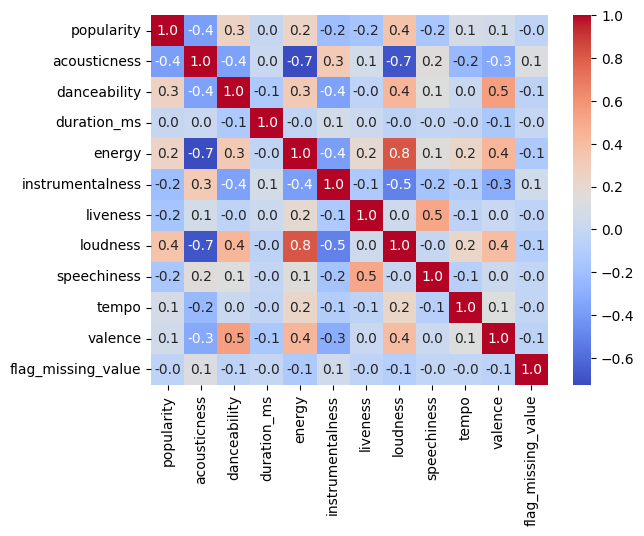

In [ ]:
# Your code here :

corr = df_music.select_dtypes(include = 'number').corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt=".1f");

Divisez votre jeu de données en un jeu d'entraînement et un jeu de test (en utilisant 80% pour l'entraînement et 20% pour le test).

Utilisez un `random_state` de **1** (pour des raisons de reproductibilité).

Maintenant entraînez votre modèle sur le jeu d'entraînement.

In [ ]:
from sklearn.linear_model import LinearRegression

y = df_music['loudness']
X = df_music[['energy']]

modelLR = LinearRegression().fit(X, y)

In [ ]:
# Your code here :

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

Et évaluez-le sur le jeu de test. Si vous avez tout fait correctement, votre score devrait être `0.6689508695872618`.

In [ ]:
# Your code here :

print(f"Score d'entrainement : {modelLR.score(X_train, y_train)}")
print(f"Score de test : {modelLR.score(X_test, y_test)}")

Score d'entrainement : 0.6652564684511418
Score de test : 0.6689535761207912


Visualisez vos données avec un nuage de points (différentes couleurs pour le jeu d'entraînement et le jeu de test).

Ajoutez une ligne de régression.

Vous devriez obtenir quelque chose comme ceci. Mais bien sûr, votre graphique aura de plus belles couleurs, et un titre !

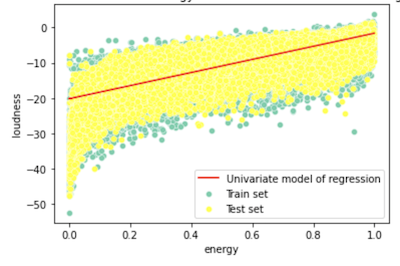

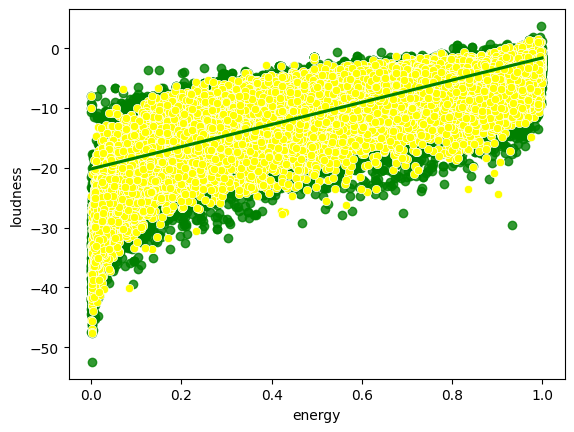

In [ ]:
sns.regplot(x = X_train['energy'],
                y = y_train,
                color = 'green')
sns.scatterplot(x = X_test['energy'],
                y = y_test,
                color = "yellow");

Affichez l'équation de la régression.

In [ ]:
# Remplace a par le coefficient et b par l'intercept du modèle

print(f"Equation : {round(modelLR.coef_[0], 2)} x + {round(modelLR.intercept_, 2)}")

Equation : 18.58 x + -20.18


Prédisez la valeur de "**loudness**" pour une valeur d'energy de 0.62

In [ ]:
# Your code here :

round(modelLR.predict([[0.62]])[0], 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



-8.66

## Bonus 2 Régression multivariée

Maintenant vous allez prédire le **loudness** d'un morceau avec toutes les autres colonnes numériques.

Vous effectuerez toutes les étapes nécessaires et garderez un `random_state` de 1.

Votre score de test devrait être meilleur (entre 0.75 et 0.8).

Y a-t-il du sur-apprentissage ?

In [ ]:
y = df_music.dropna()['loudness']
X = df_music.dropna().select_dtypes(include = 'number').drop('loudness', axis = 1)

In [ ]:
modelLR = LinearRegression().fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)

print(f"Score d'entrainement : {modelLR.score(X_train, y_train)}")
print(f"Score de test : {modelLR.score(X_test, y_test)}")

Score d'entrainement : 0.7656965920708152
Score de test : 0.7660957679528396


# Bonus 3 - Comparaison entre le top 1% de popularité et le jeu de données complet (question bonus)
Trouvez un moyen de comparer les chansons avec la plus haute popularité et les autres. Quelque chose comme cet exemple, mais vous pouvez être créatif.

Ici nous avons comparé les fréquences par genre (35% des chansons les plus populaires sont "pop", contre 4% de chansons pop dans le jeu de données total)


![comparison](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_comparison.png)

In [ ]:
df_music['Most_Popularity'] = ''
df_music = df_music.sort_values(by = 'popularity', ascending = False)
top = round(len(df_music)/100, 0)

for n in range(int(top)+1):
  df_music['Most_Popularity'].iloc[n]  = 'Top 1%'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-350-1ea317827865>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-350-1ea317827865>:6: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the i

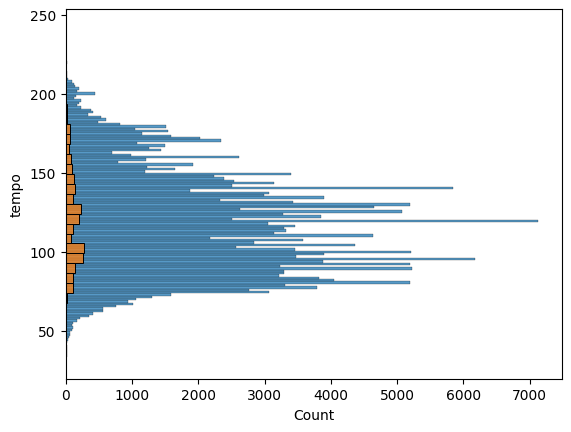

In [ ]:
colonne = 'tempo'

sns.histplot(data = df_music[df_music['Most_Popularity'] == ''],
             y = df_music[df_music['Most_Popularity'] == ''][colonne])
sns.histplot(data = df_music[~(df_music['Most_Popularity'] == '')],
             y = df_music[~(df_music['Most_Popularity'] == '')][colonne]);